# Exam #

By Nina Frandsen Jensen & Mathilde Maix

**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [226]:
# Imports 
import math 
import scipy.optimize
import numpy as np
import pandas as pd
import sympy as sm
from scipy import optimize
from tabulate import tabulate
from scipy import optimize
from sympy import symbols, lambdify
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import Exam

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [227]:
import Question1
from Question1 import OptimalLCalculator
calculator = OptimalLCalculator()
G_values = [1.0, 2.0]
optimal_L = calculator.calculate_optimal_L(G_values)
optimal_L[0]


0.5*(-kappa*nu - sqrt(nu*(4.0*alpha*w_tilde**2 + kappa**2*nu)))/(nu*w_tilde)

DETTE KAN EVT. SLETTES, HVIS CLASS FUNGERER

We have verified that $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ where $\tilde{w} = (1-\tau)w$ is the optimal labor supply  choice for $G\in\left\{1.0 , 2.0\right\}$. Our expression is not exactly identically expressed, but it is the same function, as 

$$\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}} =\frac{0.5(-\kappa\nu-\sqrt{\nu(4\alpha \tilde{w}^{2}+\kappa^{2}}\nu)}{\tilde{w}\nu}$$

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

To illustrate how $L^{\star}(\tilde{w})$ depends on $w$ we plot the optimal labor supply choice in a graph. 

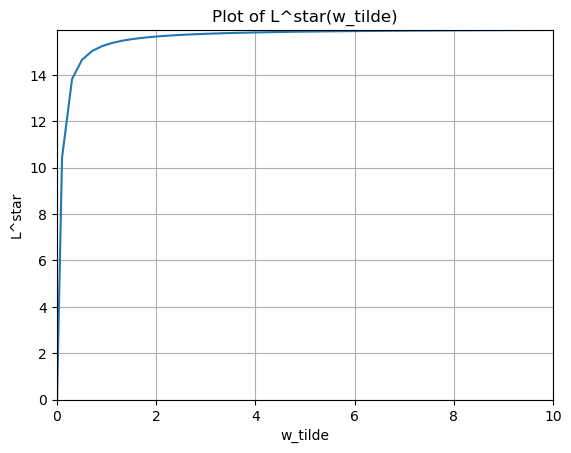

In [228]:
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16**2)
tau = 0.30
w = np.linspace(-10, 10, 100)  # Generate an array of w values

calculator = OptimalLCalculator()
calculator.plot_L_star(kappa, alpha, nu, tau, w)


The variable $\tilde{w} represents the after-tax real wage and is used in the utility maximization problem to account for the influence of taxation on the worker's decision-making. By incorporating the after-tax real wage, the model considers the trade-off between work and leisure, which allows us to analysise how taxation influences labor supply choices.

The graph of $L^*$ as a function of $\tilde{w}$ illustrates the relationship between the optimal labor supply choice and the after-tax real wage. It lets us understand how changes in the after-tax real wage affect the worker's decision to supply labor. The graph converges towards a point where further increases in the after-tax real wage has diminishing effects on the optimal labor supply choice. At this saturation point, workers may have satisfied their level of consumption and will prefer to use more time on leisure activities rather than labor.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


/Users/mathildemaix/projects-2023-n-m-3/exam/Question1.py:53: RuntimeWarning: invalid value encountered in true_divide
  
/Users/mathildemaix/projects-2023-n-m-3/exam/Question1.py:60: RuntimeWarning: invalid value encountered in true_divide
  
/Users/mathildemaix/projects-2023-n-m-3/exam/Question1.py:65: RuntimeWarning: divide by zero encountered in log
  return np.max(utility)
/Users/mathildemaix/projects-2023-n-m-3/exam/Question1.py:53: RuntimeWarning: invalid value encountered in double_scalars
  


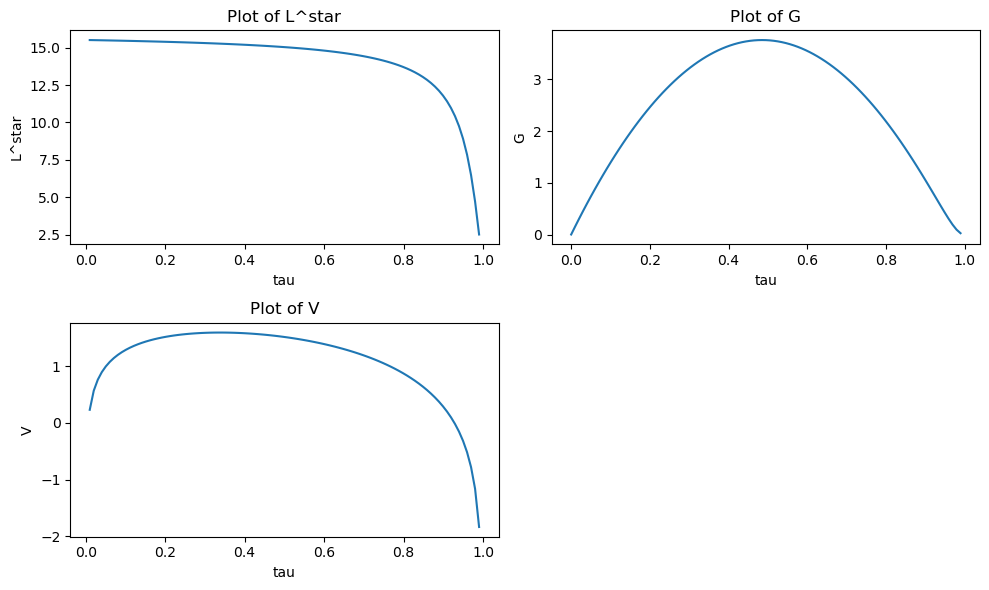

In [229]:
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16**2)
w = 1.0

calculator = OptimalLCalculator()
calculator.plot_question3(kappa, alpha, nu, w)

TEXT TIL GRAFER

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

/Users/mathildemaix/projects-2023-n-m-3/exam/Question1.py:105: RuntimeWarning: divide by zero encountered in log
  
/Users/mathildemaix/projects-2023-n-m-3/exam/Question1.py:102: RuntimeWarning: invalid value encountered in double_scalars
  G = tau * w * L_star*((1-tau)*w)


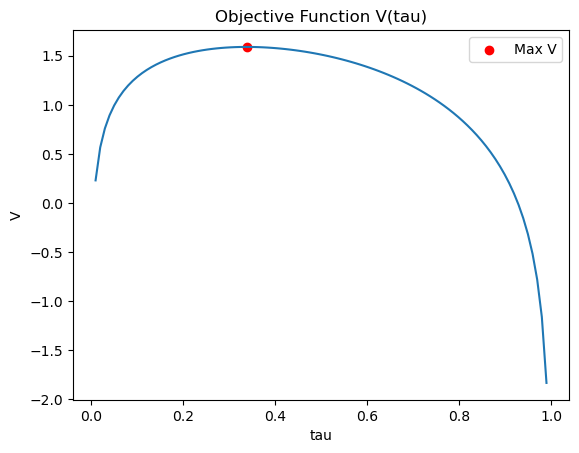

In [230]:
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16**2)
w = 1.0

calculator = OptimalLCalculator()
calculator.plot_question4(kappa, alpha, nu, w)

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [231]:
def utility(L, w, tau, G, alpha, kappa, sigma, rho, nu, epsilon):
    C = kappa + (1 - tau) * w * L
    return ((((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho)-1)/(1- rho)) - nu * (L**(1+epsilon))/(1+epsilon)

def government(G, w, tau, alpha, kappa, sigma, rho, nu, epsilon):
    L_opt = optimize.fminbound(lambda L: -utility(L, w, tau, G, alpha, kappa, sigma, rho, nu, epsilon), 0, 24)
    return G - tau * w * L_opt

# Parameter values for Set 1
w =  1.0
tau = 0.33817131261325806  # Given tau value
alpha =  0.5
kappa =  1.0
nu = 1 / (2 * 16**2)

# Set 1: sigma = 1.001, rho = 1.001, epsilon = 1.0
sigma_1 = 1.001
rho_1 = 1.001
epsilon_1 = 1.0  # Set the value of epsilon for Set 1

# Set 2: sigma = 1.5, rho = 1.5, epsilon = 1.0
sigma_2 = 1.5
rho_2 = 1.5
epsilon_2 = 1.0  # Set the value of epsilon for Set 2

# Solve for G for Set 1
initial_guess = 1.0  # Initial guess for G in Set 1
args_1 = (w, tau, alpha, kappa, sigma_1, rho_1, nu, epsilon_1)
result_1 = optimize.root(government, initial_guess, args=args_1)
G_solution_1 = result_1.x[0]
L_opt_1 = optimize.fminbound(lambda L: -utility(L, w, tau, G_solution_1, alpha, kappa, sigma_1, rho_1, nu, epsilon_1), 0, 24)

# Solve for G for Set 2
initial_guess = 1.0  # Initial guess for G in Set 2
args_2 = (w, tau, alpha, kappa, sigma_2, rho_2, nu, epsilon_2)
result_2 = optimize.root(government, initial_guess, args=args_2)
G_solution_2 = result_2.x[0]
L_opt_2 = optimize.fminbound(lambda L: -utility(L, w, tau, G_solution_2, alpha, kappa, sigma_2, rho_2, nu, epsilon_2), 0, 24)

# Print results
print("Set 1:")
print("Optimal labor supply (L^*):", L_opt_1)
print("Corresponding value of G:", G_solution_1)
print()
print("Set 2:")
print("Optimal labor supply (L^*):", L_opt_2)
print("Corresponding value of G:", G_solution_2)

Set 1:
Optimal labor supply (L^*): 15.24923313712336
Corresponding value of G: 5.156853233397843

Set 2:
Optimal labor supply (L^*): 10.43228138096569
Corresponding value of G: 3.527898288139362


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [232]:
import scipy.optimize as optimize

def utility_function(tau, w, G, alpha, kappa, sigma, rho, epsilon, nu):
    def objective_function(L):
        C = kappa + (1 - tau) * w * L
        return (((alpha * C**((sigma-1)/sigma) + (1-alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1)/(1-rho) - nu * (L**(1+epsilon))/(1+epsilon)
    
    result = optimize.minimize_scalar(lambda L: -objective_function(L), bounds=(0, 24), method='bounded')
    return -result.fun  # Negate the objective function value for maximization

def socially_optimal_tax_rate(w, G, alpha, kappa, sigma, rho, epsilon, nu):
    def objective_function(tau):
        L_star = utility_function(tau, w, G, alpha, kappa, sigma, rho, epsilon, nu)
        return abs(G - tau * w * L_star - (1 - tau) * w * L_star)  # Equality constraint: G = tau * w * L + (1 - tau) * w * L
    
    result = optimize.minimize_scalar(lambda tau: -objective_function(tau), bounds=(0, 1), method='bounded')
    return result.x

# Set 2: Parameter values
sigma = 1.5
rho = 1.5
epsilon = 1.0

# Other inputs
w = 10.0  # Real wage
G = 100.0  # Government consumption
alpha = 0.3  # Weight of private consumption
kappa = 10.0  # Free private consumption component
nu = 0.5  # Disutility of labor scaling factor

# Calculate socially optimal tax rate
tau_star = socially_optimal_tax_rate(w, G, alpha, kappa, sigma, rho, epsilon, nu)
print("Socially Optimal Tax Rate: ", tau_star)


Socially Optimal Tax Rate:  0.9999945276297217


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [233]:
p_t = sm.symbols('p_t')
y_t = sm.symbols('y_t')
w = sm.symbols('w')
kappa_t = sm.symbols('kappa_t')
ell_t = sm.symbols('ell_t')
eta = sm.symbols('eta')

# Define the profit function
profit_function = kappa_t * ell_t**(1 - eta) - w * ell_t

# Calculate the derivative of the profit function with respect to ell
derivative = sm.diff(profit_function, ell_t)

# Set the derivative equal to zero and solve for ell
optimal_ell = sm.solve(derivative, ell_t)

# Print the optimal ell expression
print("Optimal ell expression:")
print(optimal_ell)

Optimal ell expression:
[(kappa_t*(1 - eta)/w)**(1/eta)]


In [234]:
eta = 0.5
w = 1.0
kappa_values = [1.0, 2.0]

for kappa in kappa_values:
    # Calculate ell_t
    ell_t = (kappa * (1 - eta) / w) ** (1 / eta)

    # Calculate profits
    profits = kappa * ell_t ** (1 - eta) - w * ell_t

    # Print the results
    print(f"For kappa = {kappa:.1f}, the maximum profit is = {profits:.2f}")


For kappa = 1.0, the maximum profit is = 0.25
For kappa = 2.0, the maximum profit is = 1.00


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [235]:
import numpy as np

eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
K = 1000  # Number of shock series

# Simulate shock series
np.random.seed(1)
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, 120))

# Calculate value function for each shock series
value_functions = []
for k in range(K):
    kappa_series = np.exp(np.zeros(120))
    ell_series = np.zeros(120)
    value_function = 0

    for t in range(120):
        kappa_series[t] = np.exp(rho * np.log(kappa_series[t - 1]) + epsilon_series[k, t])
        ell_series[t] = (1 - eta) * kappa_series[t] / w ** (1 / eta)

        if t > 0 and ell_series[t] != ell_series[t - 1]:
            value_function += R ** (-t) * (kappa_series[t] * ell_series[t] ** (1 - eta) - w * ell_series[t] - iota)

    value_functions.append(value_function)

# Calculate expected value of the salon
H = np.mean(value_functions)

print(f"Expected value of the salon (H): {H}")


Expected value of the salon (H): 22.750737621014416


We have chosen K=1000. Higher values of K provide more precise estimations of the expected value, but also increases the loading time in visual code. 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [236]:
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
K = 1000  # Number of shock series
delta = 0.05  # Adjustment threshold

# Simulate shock series
np.random.seed(1)
epsilon_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, 120))

# Calculate value function for each shock series
value_functions = []
for k in range(K):
    kappa_series = np.exp(np.zeros(120))
    ell_series = np.zeros(120)
    value_function = 0

    for t in range(120):
        kappa_series[t] = np.exp(rho * np.log(kappa_series[t - 1]) + epsilon_series[k, t])

        ell_star = (1 - eta) * kappa_series[t] / w ** (1 / eta)

        if t == 0 or abs(ell_series[t - 1] - ell_star) > delta:
            ell_series[t] = ell_star
        else:
            ell_series[t] = ell_series[t - 1]

        if t > 0 and ell_series[t] != ell_series[t - 1]:
            value_function += R ** (-t) * (kappa_series[t] * ell_series[t] ** (1 - eta) - w * ell_series[t] - iota)

    value_functions.append(value_function)

# Calculate expected value of the salon
H = np.mean(value_functions)

print(f"New expected value of the salon (H): {H}")


New expected value of the salon (H): 9.204357941910741


The value of $H$ obtained with the updated policy is lower than the value obtained with the previous policy, it suggests that the new policy with $\Delta = 0.05$ does not improve profitability compared to the previous policy.



**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [237]:
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
K = 1000  # Number of shock series

delta_values = np.linspace(0, 0.1, 100)  # Range of delta values to search over
H_values = []

# Simulate shock series
np.random.seed(1)
epsilon_series = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=(K, 120))

# Calculate value function for each delta value
for delta in delta_values:
    value_functions = []
    for k in range(K):
        kappa_series = np.exp(np.zeros(120))
        ell_series = np.zeros(120)
        value_function = 0

        for t in range(120):
            kappa_series[t] = np.exp(rho * np.log(kappa_series[t - 1]) + epsilon_series[k, t])

            ell_star = (1 - eta) * kappa_series[t] / w ** (1 / eta)

            if t == 0 or abs(ell_series[t - 1] - ell_star) > delta:
                ell_series[t] = ell_star
            else:
                ell_series[t] = ell_series[t - 1]

            if t > 0 and ell_series[t] != ell_series[t - 1]:
                value_function += R ** (-t) * (
                        kappa_series[t] * ell_series[t] ** (1 - eta) - w * ell_series[t] - iota)

        value_functions.append(value_function)

    # Calculate expected value of the salon for the current delta value
    H = np.mean(value_functions)
    H_values.append(H)

# Find the optimal delta that maximizes H
optimal_delta = delta_values[np.argmax(H_values)]
max_H = np.max(H_values)

# Plot the results
plt.plot(delta_values, H_values)
plt.xlabel('Delta')
plt.ylabel('Expected value of the salon (H)')
plt.title('Optimization of Delta')
plt.axvline(x=optimal_delta, color='r', linestyle='--', label='Optimal Delta')
plt.legend()
plt.show()

print(f"Optimal Delta: {optimal_delta}")
print(f"Maximum H value: {max_H}")


KeyboardInterrupt: 


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
import Question3
from Question3 import RefinedGlobalOptimizer

# Create an instance of the RefinedGlobalOptimizer class with warm-up iterations = 10
optimizer_10 = RefinedGlobalOptimizer(warm_up_iterations=10)
optimizer_10.optimize()
optimizer_10.print_convergence_iteration()
optimizer_10.plot_effective_initial_guesses()

We can see that the optimizers converge all over the place, and end up in local minima instead of the global minimum. 


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# Create an instance of the RefinedGlobalOptimizer class with warm-up iterations = 10
optimizer_100 = RefinedGlobalOptimizer(warm_up_iterations=100)
optimizer_100.optimize()
optimizer_100.print_convergence_iteration()
optimizer_100.plot_effective_initial_guesses()